In [1]:
# Importing the necessary libraries for handling the Training Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading my Training Dataset
df = pd.read_csv('GUIDE_Train.csv')

**Checking for null value columns and removing the columns which has null values greater than 50%**

In [3]:
print(df.shape,'\n')

null_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
data_types = df.dtypes[null_data[null_data>0].index]
unique_counts = df.nunique()[null_data[null_data>0].index]

# Creating a DataFrame to hold the count, percentage, Datatype and Unique Values of null values side by side
missing_info = pd.DataFrame({'Null Values': null_data[null_data>0], 
                             'Percentage': missing_percentage[null_data > 0],
                             'Data Type': data_types,
                             'Unique Values': unique_counts
                             
                             })

print(missing_info,'\n')


# Setting a threshold for dropping columns (more than 50% missing values)
threshold = 0.5

missing_percentage = df.isnull().mean()
Missing_columns = missing_percentage[missing_percentage > threshold].index

df = df.drop(columns=Missing_columns)

print(df.shape,'\n')

print(df.columns)

(9516837, 45) 

                   Null Values  Percentage Data Type  Unique Values
MitreTechniques        5468386   57.460120    object           1193
IncidentGrade            51340    0.539465    object              3
ActionGrouped          9460773   99.410897    object              3
ActionGranular         9460773   99.410897    object             16
EmailClusterId         9420025   98.982729   float64          26474
ThreatFamily           9441956   99.213173    object           1745
ResourceType           9509762   99.925658    object             25
Roles                  9298686   97.707736    object             10
AntispamDirection      9339535   98.136965    object              5
SuspicionLevel         8072708   84.825536    object              2
LastVerdict            7282572   76.523030    object              5 

(9516837, 35) 

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRol

**Filling the column "IncidentGrade" by mode method**

In [ ]:
null_data = df.isnull().sum()
data_types = df.dtypes[null_data[null_data>0].index]

missing_info = pd.DataFrame({
                                'Null Values' : null_data[null_data>0],
                                'Data Type' : data_types
                            })
print(missing_info)

for col in df.columns[null_data>0]:
    print('\n',df[col].unique())
    
df['IncidentGrade'] = df['IncidentGrade'].fillna(df['IncidentGrade'].mode()[0])    

               Null Values Data Type
IncidentGrade        51340    object

 ['TruePositive' 'FalsePositive' 'BenignPositive' nan]


**From the Timestamp column I'm extracting the Date and saving it as a new column and dropping the Timestamp column from the Dataset**

In [5]:
# Convert the Timestamp column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the date (year-month-day) from the Timestamp
df['Date'] = df['Timestamp'].dt.strftime('%d-%m-%Y')

# Drop the original Timestamp column 
df.drop(columns=['Timestamp'], inplace=True)

# Verify the transformation
df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Date
0,180388628218,0,612,123247,7,6,InitialAccess,TruePositive,Ip,Related,...,881,289573,117668,3586,5,66,31,6,3,04-06-2024
1,455266534868,88,326,210035,58,43,Exfiltration,FalsePositive,User,Impacted,...,881,289573,117668,3586,5,66,242,1445,10630,14-06-2024
2,1056561957389,809,58352,712507,423,298,InitialAccess,FalsePositive,Url,Related,...,881,289573,117668,3586,5,66,242,1445,10630,13-06-2024
3,1279900258736,92,32992,774301,2,2,CommandAndControl,BenignPositive,Url,Related,...,881,289573,117668,3586,5,66,242,1445,10630,10-06-2024
4,214748368522,148,4359,188041,9,74,Execution,TruePositive,User,Impacted,...,881,289573,117668,3586,5,66,242,1445,10630,15-06-2024


**Due to insufficient RAM Size I'm taking 15 lakh samples from the Training Dataset to work in this project**

In [6]:
# Taking 15 lakh samples for futher process
df = df.sample(n=1500000,random_state=42)

In [7]:
null_data = df.isnull().sum()
print(null_data[null_data>0])
print('\n',df.info())

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
Index: 1500000 entries, 8036545 to 4532575
Data columns (total 35 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Id                  1500000 non-null  int64 
 1   OrgId               1500000 non-null  int64 
 2   IncidentId          1500000 non-null  int64 
 3   AlertId             1500000 non-null  int64 
 4   DetectorId          1500000 non-null  int64 
 5   AlertTitle          1500000 non-null  int64 
 6   Category            1500000 non-null  object
 7   IncidentGrade       1500000 non-null  object
 8   EntityType          1500000 non-null  object
 9   EvidenceRole        1500000 non-null  object
 10  DeviceId            1500000 non-null  int64 
 11  Sha256              1500000 non-null  int64 
 12  IpAddress           1500000 non-null  int64 
 13  Url                 1500000 non-null  int64 
 14  AccountSid          1500000 non-null  int64 
 15  Accoun

**Knowing the Satistical Information for Numeric and Categoric Data**

In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols,'\n')
df[numerical_cols].describe()


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object') 



,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,...,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06
mean,8.426034e+11,1.813174e+02,7.062902e+04,4.070648e+05,1.103933e+02,2.949848e+03,9.567522e+04,1.287376e+05,2.856572e+05,1.503074e+05,...,3.341904e+03,8.808007e+02,2.623151e+05,1.076450e+05,3.583604e+03,4.898297e+00,6.465247e+01,2.236705e+02,1.351427e+03,9.935682e+03
std,4.961726e+11,3.851820e+02,1.207541e+05,4.598022e+05,4.327050e+02,1.147639e+04,1.632462e+04,3.396396e+04,1.412812e+05,3.755519e+04,...,5.131610e+02,1.277069e+01,8.145494e+04,3.216400e+04,8.786753e+01,7.043466e-01,9.325609e+00,6.281128e+01,3.511028e+02,2.607948e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,4.990000e+02,2.329300e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.034900e+04,2.168400e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.436925e+04,6.727560e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.144000e+03,5.997020e+05,1.721455e+06,9.517000e+03,1.131680e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols,'\n')
df[categorical_cols].describe()

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Date'], dtype='object') 



,Category,IncidentGrade,EntityType,EvidenceRole,Date
count,1500000,1500000,1500000,1500000,1500000
unique,19,3,29,2,129
top,InitialAccess,BenignPositive,Ip,Related,04-06-2024
freq,677027,655861,344367,821293,143671


**Visualization of KDE plot for all the numeric columns help to visually inspect the distributions for skewness**

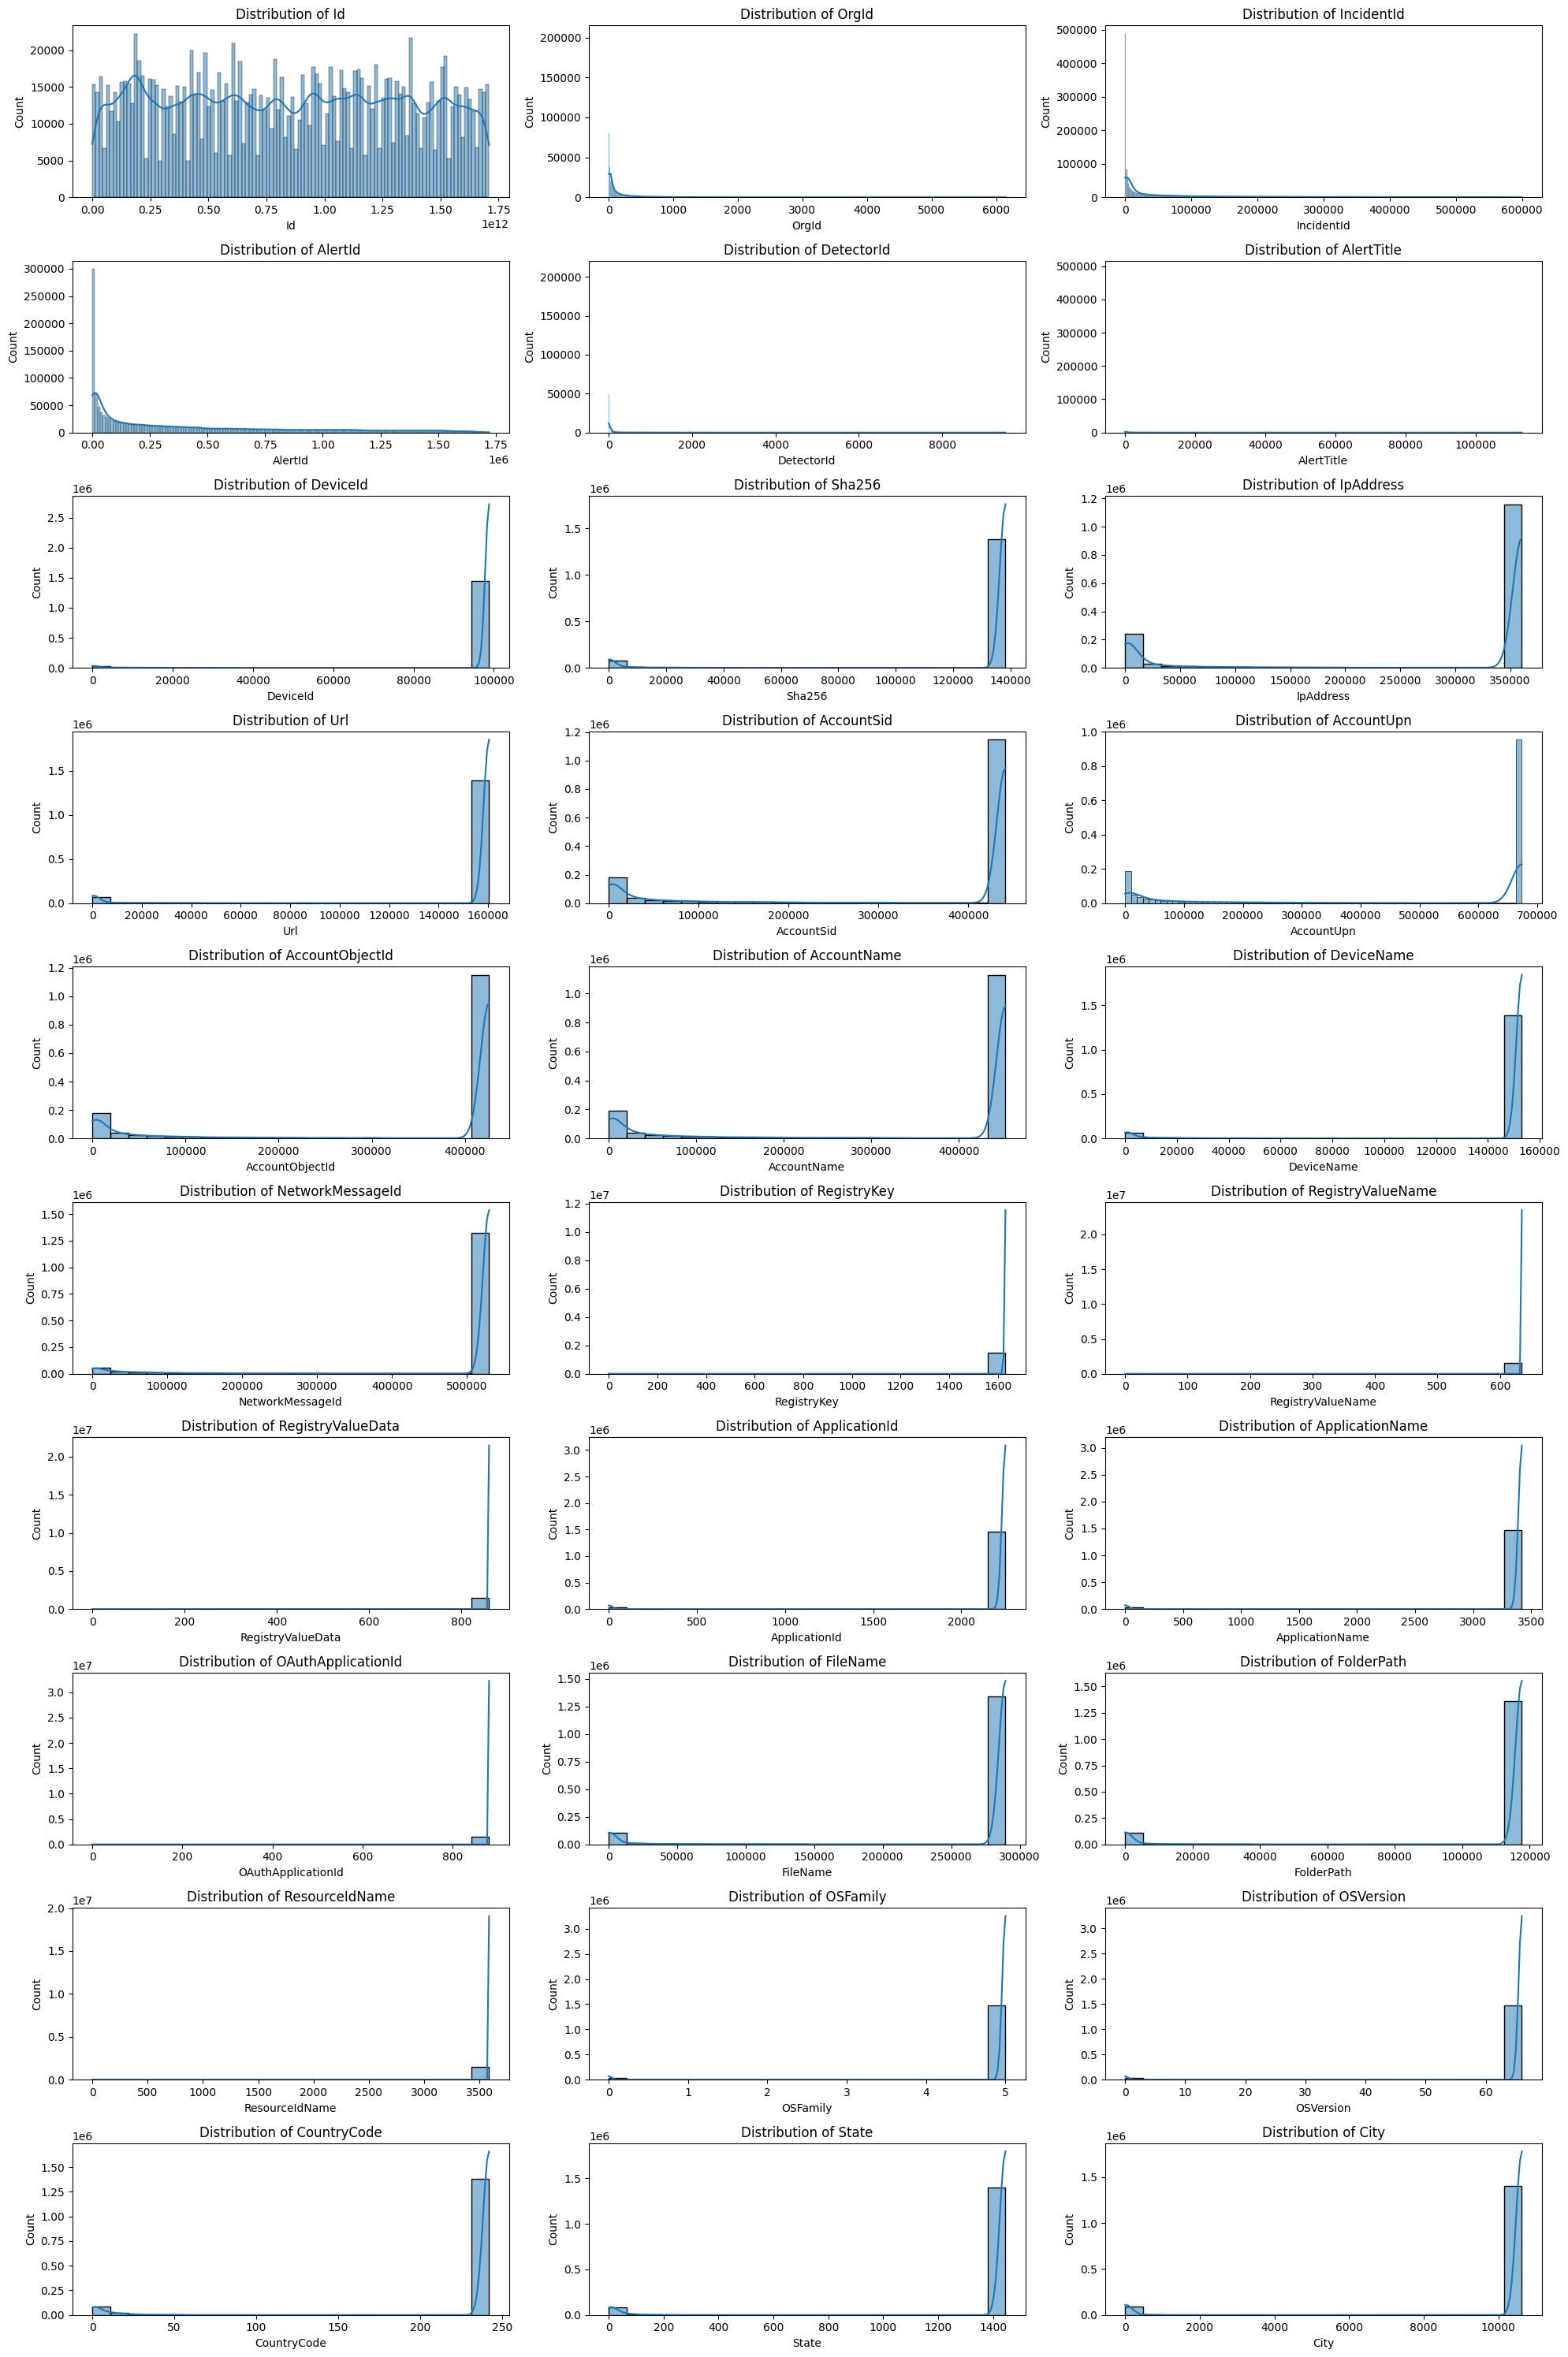

In [10]:
# numerical_cols of Train DataFrame
numerical_cols = df.select_dtypes(include=['int64']).columns

# KDE plots for numerical columns
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Indentifying the High-Cardinality numeric columns via its Unique Counts**

In [ ]:
# Checking Unique count for all numeric columns
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
    print(col,'\t',df[col].nunique())

Id 	 394898
OrgId 	 4824
IncidentId 	 292792
AlertId 	 702673
DetectorId 	 6306
AlertTitle 	 56681
DeviceId 	 27431
Sha256 	 33823
IpAddress 	 95082
Url 	 37555
AccountSid 	 142120
AccountUpn 	 214601
AccountObjectId 	 139572
AccountName 	 146096
DeviceName 	 40008
NetworkMessageId 	 119344
RegistryKey 	 477
RegistryValueName 	 178
RegistryValueData 	 256
ApplicationId 	 459
ApplicationName 	 717
OAuthApplicationId 	 164
FileName 	 59840
FolderPath 	 27947
ResourceIdName 	 605
OSFamily 	 5
OSVersion 	 36
CountryCode 	 184
State 	 902
City 	 3939


**By the KDE plot visualization and Unique count values of the numeric column I came to know that 99% of the numeric columns has to be treated as categoric even though its data is numeric except one column i.e, "Id" which has continuous distribution of data**

**Visualization of Categoric columns with Countplot to know how efficient the data is inside those categoric columns**

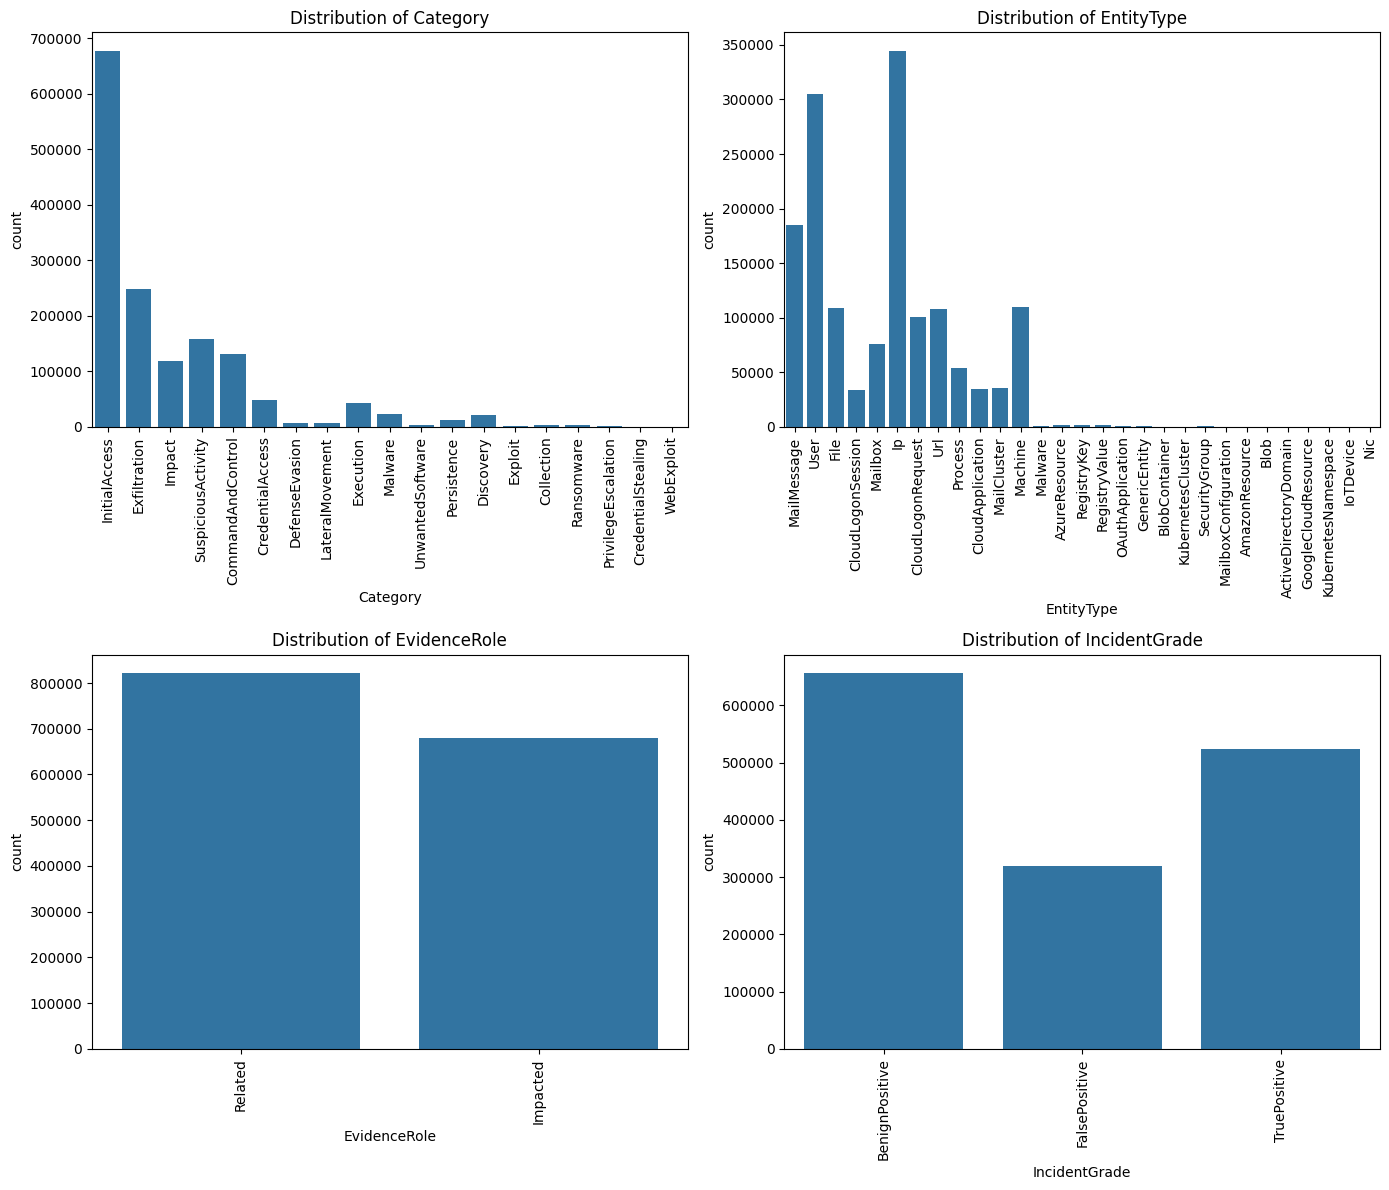

In [ ]:
# Selecting the categoric columns from the df
categorical_columns = df.select_dtypes(include=['object']).columns
Exclude_col = ['Date']

Cate_col = categorical_columns.difference(Exclude_col)

plt.figure(figsize=(14, 12))

for i, col in enumerate(Cate_col):
    plt.subplot((len(Cate_col) + 1) // 2, 2, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()    
plt.show()

**Visualization of the Class Imbalance of Target column "IncidentGrade" via, numeric form, count plot and pie chart**

IncidentGrade
BenignPositive    655861
TruePositive      524405
FalsePositive     319734
Name: count, dtype: int64


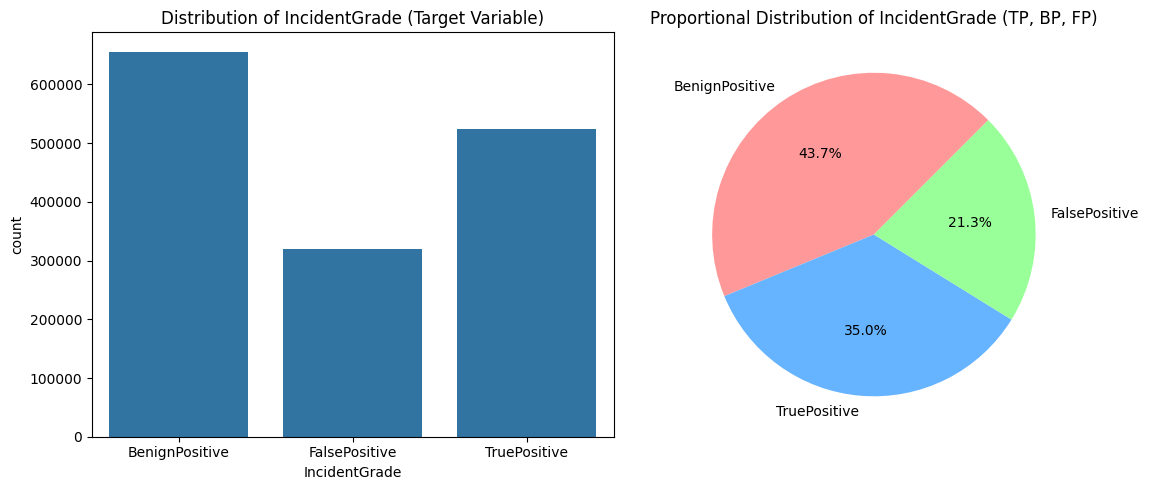

In [13]:
# Count the distribution of the target variable
target_counts = df['IncidentGrade'].value_counts()
print(target_counts)

plt.figure(figsize=(12, 5))

# Plot 1: Countplot of IncidentGrade
plt.subplot(1, 2, 1)                                 # 1 row, 2 columns, plot 1 (creates the first plot on the left)
sns.countplot(x='IncidentGrade', data=df)
plt.title("Distribution of IncidentGrade (Target Variable)")

# Plot 2: Pie chart of IncidentGrade distribution
plt.subplot(1, 2, 2)                                 # 1 row, 2 columns, plot 2 (creates the second plot on the right)
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=45, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Proportional Distribution of IncidentGrade (TP, BP, FP)')

plt.tight_layout() 
plt.show()

**Dropping the Column "Date" from 15 lakh samples of data because it does not provide efficient imformation for us and saving the dataset to a new csv file**

In [14]:
df = df.drop(columns = ['Date'])

In [15]:
# Saving the 15 lakh sample data to a new csv file 
path=r"D:/Mirthu/Microsoft_CyberSecurity/Training Data.csv"
df.to_csv(path,index=False)